# Heart Stroke Prediction

### Importing libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Importing Dataset

In [111]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\heart_disease.csv')

In [112]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [113]:
df.shape

(4238, 16)

In [114]:
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

### removing null values

In [115]:
df.isna().sum()

Gender               0
age                  0
education          106
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            392
Heart_ stroke        0
dtype: int64

In [116]:
df.dropna(inplace=True)

In [117]:
df.isna().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

### removing duplicate values

In [118]:
df.duplicated().sum()

5

In [119]:
df=df.drop_duplicates()

In [120]:
df.duplicated().sum()

0

In [121]:
df.shape

(3646, 16)

In [122]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [123]:
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

In [124]:
df['Heart_ stroke'].value_counts()

No     3091
yes     555
Name: Heart_ stroke, dtype: int64

In [125]:
df.rename(columns={'Heart_ stroke': 'Heartstroke'}, inplace=True)

In [126]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heartstroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [127]:
df['prevalentStroke'].value_counts()

no     3626
yes      20
Name: prevalentStroke, dtype: int64

In [128]:
df['education'].value_counts()

uneducated       1522
primaryschool    1098
graduate          604
postgraduate      422
Name: education, dtype: int64

In [129]:
df['Gender'].value_counts()

Female    2031
Male      1615
Name: Gender, dtype: int64

### removing the irrelevant column

In [130]:
df.drop(["education"],axis=1,inplace=True)

In [131]:
df.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heartstroke
0,Male,39,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


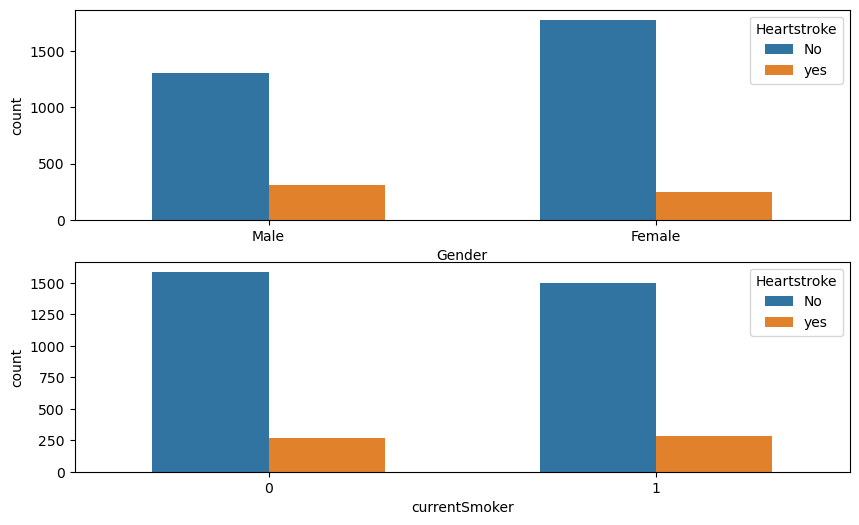

In [132]:
plt.figure(figsize=((10,6)))
plt.subplot(2,1,1)
sns.countplot(data=df, width = 0.6, x='Gender', hue='Heartstroke')
plt.subplot(2,1,2)
sns.countplot(data=df, width = 0.6, x='currentSmoker', hue='Heartstroke')
plt.show()

<Axes: xlabel='age', ylabel='count'>

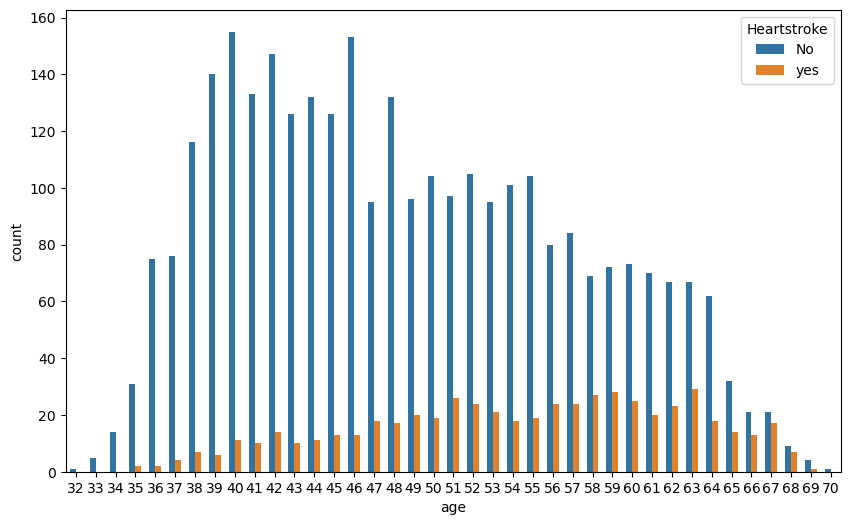

In [133]:
plt.figure(figsize=((10,6)))
sns.countplot(data=df, width = 0.6, x='age', hue='Heartstroke', orient='h')

### Correlation

In [134]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11220\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.210840,-0.189006,0.137040,0.306830,0.109164,0.267681,0.388916,0.209346,0.138267,-0.002878,0.118388
currentSmoker,-0.210840,1.000000,0.773382,-0.054155,-0.107254,-0.042181,-0.050943,-0.134109,-0.115797,-0.160163,0.051417,-0.052999
cigsPerDay,-0.189006,0.773382,1.000000,-0.048380,-0.069473,-0.037133,-0.030207,-0.094284,-0.056340,-0.087136,0.064606,-0.053404
BPMeds,0.137040,-0.054155,-0.048380,1.000000,0.262509,0.049457,0.094358,0.272123,0.200277,0.104238,0.015011,0.055438
prevalentHyp,0.306830,-0.107254,-0.069473,0.262509,1.000000,0.080960,0.167425,0.698241,0.617956,0.303356,0.148162,0.086974
diabetes,0.109164,-0.042181,-0.037133,0.049457,0.080960,1.000000,0.048521,0.102631,0.050748,0.089087,0.061007,0.615034
totChol,0.267681,-0.050943,-0.030207,0.094358,0.167425,0.048521,1.000000,0.220275,0.175104,0.120931,0.093266,0.050045
sysBP,0.388916,-0.134109,-0.094284,0.272123,0.698241,0.102631,0.220275,1.000000,0.786687,0.331119,0.184701,0.134680
diaBP,0.209346,-0.115797,-0.056340,0.200277,0.617956,0.050748,0.175104,0.786687,1.000000,0.385807,0.178761,0.063534
BMI,0.138267,-0.160163,-0.087136,0.104238,0.303356,0.089087,0.120931,0.331119,0.385807,1.000000,0.074904,0.084154


C:\Users\DELL\AppData\Local\Temp\ipykernel_11220\2177666910.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Paired")


<Axes: >

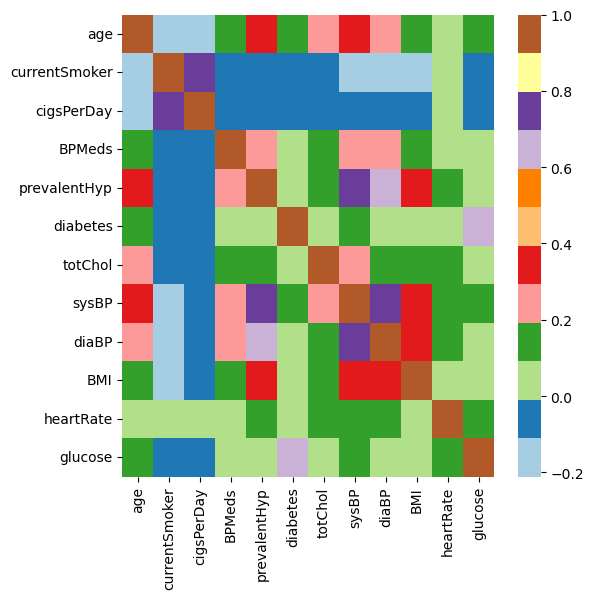

In [105]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap="Paired")

### label encoding

#### to convert all string values to numerical values 

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [26]:
df.Gender=le.fit_transform(df.Gender)
df.prevalentStroke=le.fit_transform(df.prevalentStroke)
df.Heartstroke=le.fit_transform(df.Heartstroke)

In [27]:
df.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heartstroke
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Seperating target variable from dataframe

In [31]:
X = df.drop('Heartstroke',axis=1)
Y = df['Heartstroke']

In [34]:
X.head()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [35]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heartstroke, dtype: int32

In [36]:
X.dtypes

Gender               int32
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int32
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object

### Balancing the data wrt target variable "Heartstroke"

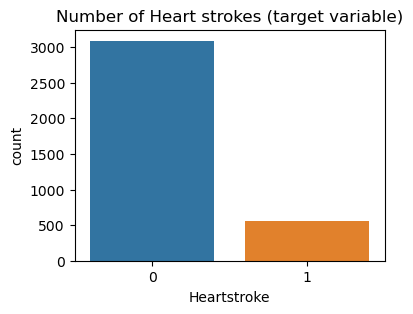

In [28]:
plt.figure(figsize=(4,3))
sns.countplot(x=df.Heartstroke)
plt.title('Number of Heart strokes (target variable)')
plt.show()

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros=RandomOverSampler()

In [39]:
RX, RY = ros.fit_resample(X,Y)

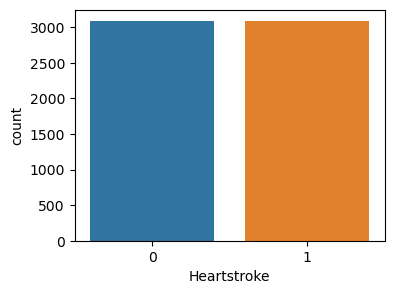

In [42]:
plt.figure(figsize=(4,3))
sns.countplot(x=RY)
plt.show()

## Model Building

### spliting training data and test data in 80:20 ratio

In [43]:
RX_train,RX_test,RY_train,RY_test=train_test_split(RX, RY,test_size=0.2, random_state = 2)   #RX and RY are balanced datasets

## Logistic Regression

In [44]:
LR = LogisticRegression()

In [54]:
LR.fit(RX_train,RY_train) #training the model

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
LR_prediction = LR.predict(RX_test)
LR_accuracy = accuracy_score(RY_test, LR_prediction)

In [48]:
print('Logistic Regression Accuracy: ', LR_accuracy)

Logistic Regression Accuracy:  0.6394502829426031


In [50]:
print(classification_report(RY_test,LR_prediction))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       618
           1       0.64      0.63      0.64       619

    accuracy                           0.64      1237
   macro avg       0.64      0.64      0.64      1237
weighted avg       0.64      0.64      0.64      1237



## Decision Tree

In [52]:
DCT = DecisionTreeClassifier()

In [53]:
DCT.fit(RX_train, RY_train)  #training the model

DecisionTreeClassifier()

In [55]:
DCT_prediction = DCT.predict(RX_test)
DCT_accuracy = accuracy_score(RY_test, DCT_prediction)

In [56]:
print('Decision Tree Accuracy: ', DCT_accuracy)

Decision Tree Accuracy:  0.9070331447049312


In [57]:
print(classification_report(RY_test,DCT_prediction))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       618
           1       0.85      1.00      0.91       619

    accuracy                           0.91      1237
   macro avg       0.92      0.91      0.91      1237
weighted avg       0.92      0.91      0.91      1237



## Random Forest

In [58]:
RFC= RandomForestClassifier(n_estimators=200)

In [59]:
RFC.fit(RX_train, RY_train)  #training the model

RandomForestClassifier(n_estimators=200)

In [60]:
RFC_prediction = RFC.predict(RX_test)
RFC_accuracy = accuracy_score(RY_test, RFC_prediction)

In [61]:
print('Random Forest Accuracy: ', RFC_accuracy)

Random Forest Accuracy:  0.9717057396928052


In [62]:
print(classification_report(RY_test,RFC_prediction))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       618
           1       0.95      1.00      0.97       619

    accuracy                           0.97      1237
   macro avg       0.97      0.97      0.97      1237
weighted avg       0.97      0.97      0.97      1237



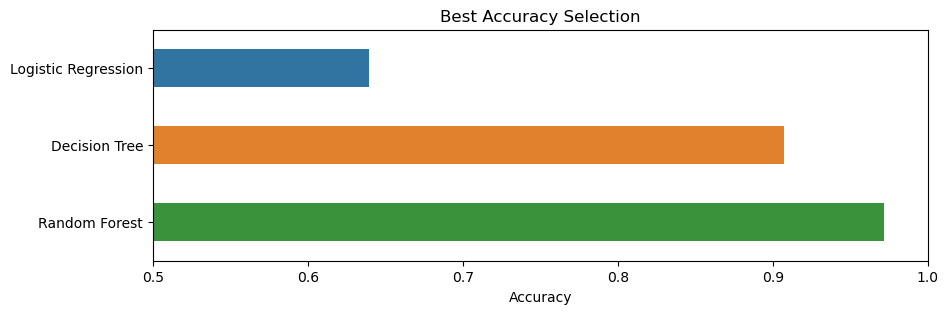

In [63]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [LR_accuracy, DCT_accuracy, RFC_accuracy]

plt.figure(figsize=(10, 3))
sns.barplot(x=accuracies, y=classifiers, width=0.5, orient='h')  # Set orient to 'h' for horizontal
plt.title('Best Accuracy Selection')
plt.xlabel('Accuracy')
plt.xlim(0.50, 1)  # Set x-axis limits for accuracy values
plt.show()

# Winner = Random Forest 